# Object Detection with YOLOv3 and OpenCV
# Version 2

Following the tutorial at [PyImageSearch](https://pyimagesearch.com/2018/11/12/yolo-object-detection-with-opencv/) (2018).  
Uses the API exposed by `cloud_detect`.

In [1]:
from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt

import cloud_detect.io
from cloud_detect.object_detection import load_model, detect_objects

In [2]:
yolo_dir = Path("../yolo_tiny_configs")
net, labels = load_model(yolo_dir)

2024-04-21 19:31:45.932 | INFO     | cloud_detect.object_detection:load_model:21 - Read YOLOv3 labels from ../yolo_tiny_configs/coco.names.
2024-04-21 19:31:45.934 | INFO     | cloud_detect.object_detection:load_model:25 - Loading YOLOv3 from disk...
2024-04-21 19:31:45.950 | INFO     | cloud_detect.object_detection:load_model:27 - Loaded YOLOv3 from disk.


In [3]:
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(labels), 3), dtype="uint8")

In [4]:
image_dir = Path("../tests/data/images")
images = list(image_dir.glob("*.jpg"))
images

[PosixPath('../tests/data/images/000000000872.jpg'),
 PosixPath('../tests/data/images/000000000632.jpg'),
 PosixPath('../tests/data/images/000000000785.jpg'),
 PosixPath('../tests/data/images/000000000724.jpg'),
 PosixPath('../tests/data/images/000000001268.jpg'),
 PosixPath('../tests/data/images/000000000802.jpg'),
 PosixPath('../tests/data/images/000000001000.jpg'),
 PosixPath('../tests/data/images/000000000776.jpg'),
 PosixPath('../tests/data/images/000000000285.jpg'),
 PosixPath('../tests/data/images/000000000139.jpg'),
 PosixPath('../tests/data/images/000000000885.jpg')]

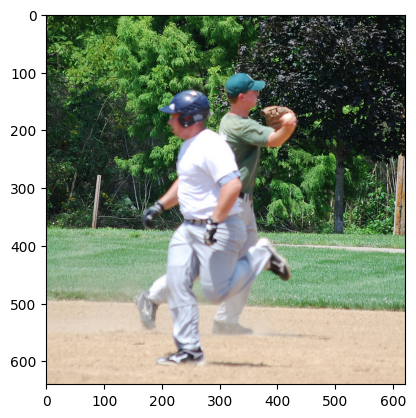

In [5]:
img_idx = 0

image = cloud_detect.io.image_file_to_cv2_image(images[img_idx])
plt_img = cloud_detect.io.cv2_image_to_plt_image(image)
plt.imshow(plt_img);

In [6]:
objects = detect_objects(image, net, labels)

2024-04-21 19:31:46.408 | INFO     | cloud_detect.object_detection:detect_objects:40 - YOLO took 0.189440 seconds
2024-04-21 19:31:46.418 | INFO     | cloud_detect.object_detection:detect_objects:80 - YOLO found 1 objects.


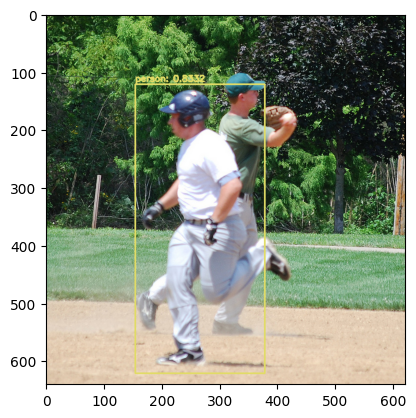

In [7]:
if len(objects) > 0:
    for obj in objects:
        rect = obj["rectangle"]
        h, w, x, y = rect['height'], rect['width'], rect['left'], rect['top']
        color = [int(c) for c in COLORS[labels.index(obj["label"])]]
        text = "{}: {:.4f}".format(obj["label"], obj["accuracy"])
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    plt_img = cloud_detect.io.cv2_image_to_plt_image(image)
    plt.imshow(plt_img);
else: 
    print("No objects detected")